<a href="https://colab.research.google.com/github/sheetalgiri/merfish-data-processing/blob/main/merfish_cell_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import polygon

We want to segment individual cells from the merfish imaging data made available by Zhang et al in their paper "Molecular, spatial and projection diversity of neurons in primary motor cortex revealed by in situ single-cell transcriptomics" ( [biorxiv](https://www.biorxiv.org/content/10.1101/2020.06.04.105700v1.full)). According to the paper all raw and processed MERFISH data can be accessed via the Brain Image Library (BIL) ftp archive: ftp://download.brainimagelibrary.org:8811/02/26/02265ddb0dae51de/. **HOWEVER**,  the readme in this dataset tells the updated collection is at  https://download.brainimagelibrary.org/cf/1c/cf1c1a431ef8d021 so we use this link instead

As explained in the readme in the dataset, each experiment contains many fields of view (FOVs) and each tiff file in a sample folder corresponds to the images of one FOV for that sample

For demonstration purposes we only work with one sample and one fov in the tutorial, in particular mouse1,sample1,fov 1 

First we download the corresponding image tif

In [27]:
!wget https://download.brainimagelibrary.org/cf/1c/cf1c1a431ef8d021/mouse1_sample1_processed/processed_images1.tif -O mouse1_sample1_fov1.tif

--2022-09-11 16:30:06--  https://download.brainimagelibrary.org/cf/1c/cf1c1a431ef8d021/mouse1_sample1_processed/processed_images1.tif
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.62, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 515942843 (492M) [image/tiff]
Saving to: ‘mouse1_sample1_fov1.tif’

mouse1_sample1_fov1 100%[===================>] 492.04M  6.29MB/s    in 20s     

2022-09-11 16:30:31 (24.5 MB/s) - ‘mouse1_sample1_fov1.tif’ saved [515942843/515942843]



## Get the cell segment boundaries

We download the file containing the segmented cell boundary coordinates of each z-plane and the slice id that each cell belongs to for this particular sample.

In [2]:
!wget https://download.brainimagelibrary.org/cf/1c/cf1c1a431ef8d021/processed_data/segmented_cells_mouse1sample1.csv

--2022-09-11 14:24:22--  https://download.brainimagelibrary.org/cf/1c/cf1c1a431ef8d021/processed_data/segmented_cells_mouse1sample1.csv
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.62, 192.231.243.61
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 670046322 (639M) [application/octet-stream]
Saving to: ‘segmented_cells_mouse1sample1.csv’

segmented_cells_mou 100%[===================>] 639.01M  89.5MB/s    in 7.2s    

2022-09-11 14:24:30 (88.5 MB/s) - ‘segmented_cells_mouse1sample1.csv’ saved [670046322/670046322]



In [17]:
sample_segmentation_data=pd.read_csv("/content/segmented_cells_mouse1sample1.csv", index_col=0)
sample_segmentation_data

,boundaryX_z6,boundaryY_z6,boundaryX_z5,boundaryY_z5,boundaryX_z4,boundaryY_z4,boundaryX_z3,boundaryY_z3,boundaryX_z2,boundaryY_z2,boundaryX_z1,boundaryY_z1,boundaryX_z0,boundaryY_z0,slice_id
100002246487729891775754092425114477436,"814.4778316043318, 814.3693316079676, 814.3693...","-3148.8119035363197, -3149.245903521776, -3149...","814.3693316079676, 814.3693316079676, 814.3693...","-3148.920403532684, -3149.4629035145044, -3150...","814.4778316043318, 814.3693316079676, 814.3693...","-3149.4629035145044, -3149.896903499961, -3150...","814.5863316006959, 814.5863316006959, 814.5863...","-3149.028903529048, -3149.5714035108685, -3150...","815.1288315825165, 815.1288315825165, 815.0203...","-3154.670903339982, -3155.2134033218026, -3155...","816.2138315461576, 816.2138315461576, 816.0944...","-3154.8879033327103, -3155.430403314531, -3155...","816.53933153525, 816.53933153525, 816.43083153...","-3154.8879033327103, -3155.430403314531, -3155...",mouse1_slice40
100006592165978924204028942520409194775,"-3952.1745568417014, -3952.1745568417014, -395...","-2787.9276005104184, -2788.470100492239, -2788...","-3952.1745568417014, -3952.1854068413377, -395...","-2788.470100492239, -2788.914950477332, -2789....","-3952.1745568417014, -3952.3915568344296, -395...","-2788.9041004776955, -2789.229600466788, -2789...","-3954.1275567762555, -3954.1275567762555, -395...","-2787.71060051769, -2788.2531004995108, -2788....","-3955.8635567180813, -3956.19990670681, -3956....","-2798.886100143194, -2799.0054501391946, -2798...","-3954.77855675444, -3954.8870567508043, -3955....","-2799.428600125015, -2799.8626001104712, -2800...","-3955.2125567398966, -3955.2125567398966, -395...","-2798.886100143194, -2799.428600125015, -2799....",mouse1_slice31
100023039956376282494130276516336349465,"1010.3548317424953, 1010.3548317424953, 1010.2...","-2275.682905986905, -2276.2254059687257, -2276...","1010.5718317352236, 1010.5718317352236, 1010.4...","-2275.1404060050845, -2275.682905986905, -2276...","1010.5718317352236, 1010.5718317352236, 1010.5...","-2273.838406048715, -2274.3809060305357, -2274...","1010.8973317243159, 1010.8973317243159, 1010.7...","-2274.9234060123563, -2275.465905994177, -2275...","1011.873831691593, 1011.8629816919565, 1011.64...","-2275.2489060014486, -2275.6937559865414, -227...","1011.3313317097724, 1011.3313317097724, 1011.2...","-2275.0319060087204, -2275.574405990541, -2275...","1010.6803317315877, 1010.6803317315877, 1010.6...","-2274.3809060305357, -2274.9234060123563, -227...",mouse1_slice40
100023173600007776283900355785793185282,"3345.3097476385533, 3345.201247642189, 3345.09...","1457.9994725063443, 1457.5654725208879, 1457.1...","3345.3097476385533, 3345.3097476385533, 3345.2...","1458.4334724918008, 1457.8909725099802, 1457.4...","3345.3097476385533, 3345.298897638917, 3345.20...","1458.3249724954367, 1457.8801225103439, 1457.3...","3345.3097476385533, 3345.298897638917, 3345.20...","1458.3249724954367, 1457.8801225103439, 1457.3...","3345.3097476385533, 3345.3097476385533, 3345.3...","1458.650472484529, 1458.1079725027084, 1457.56...","3345.3097476385533, 3345.3097476385533, 3345.3...","1459.1929724663496, 1458.650472484529, 1458.10...","3345.3097476385533, 3345.3097476385533, 3345.3...","1459.4099724590778, 1458.8674724772573, 1458.3...",mouse1_slice1
100040857293507150543672434367851019344,"-5290.4279592908915, -5290.4279592908915, -529...","1209.2685058042407, 1208.7260058224201, 1208.1...","-5289.234459330886, -5289.234459330886, -5289....","1207.4240058660507, 1206.8815058842301, 1206.4...","-5288.5834593527015, -5288.5834593527015, -528...","1207.3155058696866, 1206.773005887866, 1206.23...","-5287.932459374517, -5287.932459374517, -5287....","1206.8815058842301, 1206.3390059024096, 1205.8...","-5287.389959392696, -5287.49845938906, -5287.6...","1206.773005887866, 1206.3390059024096, 1205.90...","-5286.95595940724, -5287.064459403604, -5287.0...","1206.664505891502, 1206.2305059060454, 1205.68...","-5286.738959

## Get information about which cell corresponds to which FOV

Unfortunately we couldn't find a way to get the information from the files in the dataset. On our request the authors shared a file 'cell_metadata.csv' that contains the information needed to extract the segments, as the file is not available publicly I will only share the fields of the datatable to give you an idea of what was provided. Without it there was no way to find which cell originated from which fov in a particular sample. If you need it, you will have to contact the authors. 

*For each cell in the dataset, the sample_id(i.e mouse_number + sample_number) and the fov_id of the cell are provided among other things. For our purposes, we only use information from these two fields*

In [14]:
cell_metadata=pd.read_csv("/content/cell_metadata_full.csv", index_col=0)
cell_metadata.columns

Index(['full_cell_id', 'fovID', 'fov_x', 'fov_y', 'volume', 'center_x',
       'center_y', 'slice_id', 'sample_id', 'label', 'subclass', 'class_label',
       'short_cell_id'],
      dtype='object')

Join the segmentation boundaries datatable and 'cell_metadata' datatable to bring together three pieces of infomation i.e  cell_id, fov_id and boundary coordinates (we will only use z3 boundaries boundaryX_z2, boundaryY_z3)

In [61]:
joined_cell_data=sample_segmentation_data[[ 'boundaryX_z3', 'boundaryY_z3']].join(cell_metadata.set_index("full_cell_id"),how="inner",lsuffix="cell")
joined_cell_data.columns

Index(['boundaryX_z3', 'boundaryY_z3', 'fovID', 'fov_x', 'fov_y', 'volume',
       'center_x', 'center_y', 'slice_id', 'sample_id', 'label', 'subclass',
       'class_label', 'short_cell_id'],
      dtype='object')

## Download the field of value (FOV) position for the corresponding sample

For our purposes since we only care about FOV 1 we only use the coordinates in that position

In [5]:
!wget https://download.brainimagelibrary.org/cf/1c/cf1c1a431ef8d021/additional_files/fov_positions/mouse1_sample1.txt -O fov_mouse1_sample1.txt 

--2022-09-11 14:51:10--  https://download.brainimagelibrary.org/cf/1c/cf1c1a431ef8d021/additional_files/fov_positions/mouse1_sample1.txt
Resolving download.brainimagelibrary.org (download.brainimagelibrary.org)... 192.231.243.61, 192.231.243.62
Connecting to download.brainimagelibrary.org (download.brainimagelibrary.org)|192.231.243.61|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8423 (8.2K) [text/plain]
Saving to: ‘fov_mouse1_sample1.txt’

fov_mouse1_sample1. 100%[===================>]   8.23K  --.-KB/s    in 0s      

2022-09-11 14:51:10 (123 MB/s) - ‘fov_mouse1_sample1.txt’ saved [8423/8423]



In [66]:
fov_info=pd.read_csv("/content/fov_mouse1_sample1.txt", header=None, names=["fov_x","fov_y"])
fov_info

,fov_x,fov_y
0,3804.87,1366.11
1,3804.87,1166.11
2,3604.87,766.11
3,3604.87,966.11
4,3604.87,1166.11
...,...,...
443,5231.67,-2233.91
444,5231.67,-2033.91
445,5231.67,-1833.91
446,5231.67,-1633.91


In [67]:
fov_info.iloc[1]['fov_x'], fov_info.iloc[1]['fov_y'] #we use this

(3804.87, 1166.11)

## Define some helper functions to calculate the mask

We define a function 'str2list' to convert boundary which is currently given in string format as "1.2,1.3,1.4" to a list of floats [1.2,1.3,1.4]

In [62]:
def str2list_boundary(boundary_list):
    if type(boundary_list)==str:
        boundary_list = list(map(float,boundary_list.split(',')))
    elif type(boundary_list)==float:
        boundary_list=[boundary_list] # make input iterable eg. 0.1 to [0.1]
    elif boundary_list=='nan' : #handle nan
        boundary_list=[0.0]
    return boundary_list 


We also define 'segment_scaling' as the measurements given are in microns and should be converted to pixels. According to the information in ['additional_files/microscope.json'](https://download.brainimagelibrary.org/cf/1c/cf1c1a431ef8d021/additional_files/microscope.json) the resolution of the images is 0.1085 microns i.e 108.5 nanometers per pixel. Since the boundaries are given relative to the field of view and thus contain negative values, we subtract the coordinated of the field of view before doing the scaling the function to get positive coordinates that can be converted to pixels.

In [ ]:
def segment_scaling(boundaries,fov_position):
    pixelSize=0.1085 #pixel resolution in microns
    return np.round((np.array(boundaries)-fov_position)/pixelSize)

## Calculating the segment mask for Mouse 1, Sample 1, FOV 1

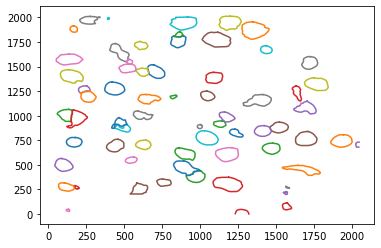

In [63]:
joined_cell_data['boundaryX_z3'] = joined_cell_data['boundaryX_z3'].map(str2list_boundary)#string to float
joined_cell_data['boundaryY_z3'] = joined_cell_data['boundaryY_z3'].map(str2list_boundary)

fov_cells = joined_cell_data[joined_cell_data["fovID"]==1]
rr_list = []
cc_list = []
mask = np.zeros((2048,2048))
for j in range(len(fov_cells)):
    boundaryX = segment_scaling(fov_cells.iloc[j]['boundaryX_z3'],fov_info.iloc[1]['fov_x'])
    boundaryY = segment_scaling(fov_cells.iloc[j]['boundaryY_z3'],fov_info.iloc[1]['fov_y'])
    rr,cc = polygon(boundaryX,boundaryY)
    mask[rr,cc] = fov_cells.iloc[j]['short_cell_id'].copy()
    plt.plot(boundaryY,boundaryX)
plt.show()

## Check that the segmentations we get from the mask are correct

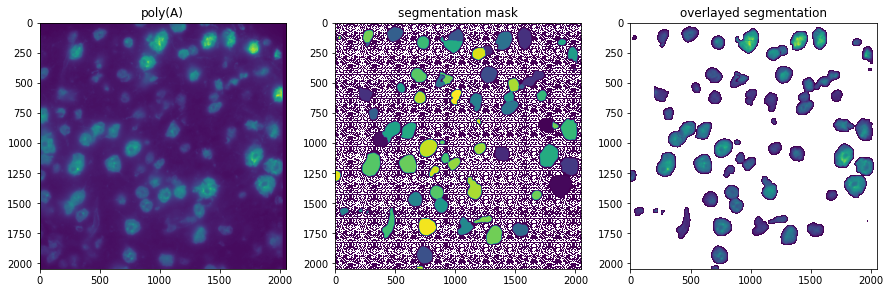

In [64]:
img = Image.open("/content/mouse1_sample1_fov1.tif")
img_channels = []
for i in range(0, img.n_frames,7):  # frame organization explained in data_organization_processed.csv, tiff stacks are ordered as channel 1 z-planes 1 through 7, channel 2 z-planes 1 through 7, â€¦, channel 40 z-plane 1 through 7.
    img.seek(i + 3)  # choose central z-plane, z3 with respect to which we did the calculations
    img_channels.append(np.array(img))
img.close()
img = np.array(img_channels)
img = np.transpose(img, (1, 2, 0))
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# polyA channel
img_22=img[:,:,22]
ax[0].imshow(img_22)
ax[0].set_title('poly(A)')
ax[1].imshow(np.rot90(mask)[::-1, :])
ax[1].set_title('segmentation mask')
cmap = plt.cm.get_cmap("viridis")
cmap.set_under(color='white') 
mask[mask > 0] = 1
ax[2].imshow(img_22*np.rot90(mask)[::-1, :], cmap=cmap, vmin=0.1)
ax[2].set_title('overlayed segmentation')
plt.show()